In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
headers = ["time","counts","error","rate"]
df = pd.read_csv('./DataSetCSV/ch2_xsm_20221111_v1_level2_t1.csv',names=headers)
print(df)

               time    counts     error  rate
0      1.848960e+08  2336.467  48.33702   1.0
1      1.848960e+08  2212.512  47.03735   1.0
2      1.848960e+08  2174.737  46.63407   1.0
3      1.848960e+08  2315.729  48.12202   1.0
4      1.848960e+08  2326.478  48.23357   1.0
...             ...       ...       ...   ...
34706  1.849823e+08  1791.529  42.32646   1.0
34707  1.849823e+08  1701.851  41.25350   1.0
34708  1.849823e+08  1909.490  43.69771   1.0
34709  1.849823e+08  1721.299  41.48854   1.0
34710  1.849823e+08  1799.190  42.41686   1.0

[34711 rows x 4 columns]


Making time in seconds for a given date

In [2]:
val = df.time[1]
for i in range (len(df.time)-1):
    df.time[i+1]= df.time[i+1]-val+1
df.time[0]=0
print(df)


          time    counts     error  rate
0          0.0  2336.467  48.33702   1.0
1          1.0  2212.512  47.03735   1.0
2          2.0  2174.737  46.63407   1.0
3          3.0  2315.729  48.12202   1.0
4          4.0  2326.478  48.23357   1.0
...        ...       ...       ...   ...
34706  86304.0  1791.529  42.32646   1.0
34707  86305.0  1701.851  41.25350   1.0
34708  86306.0  1909.490  43.69771   1.0
34709  86307.0  1721.299  41.48854   1.0
34710  86308.0  1799.190  42.41686   1.0

[34711 rows x 4 columns]


Plot of the csv data

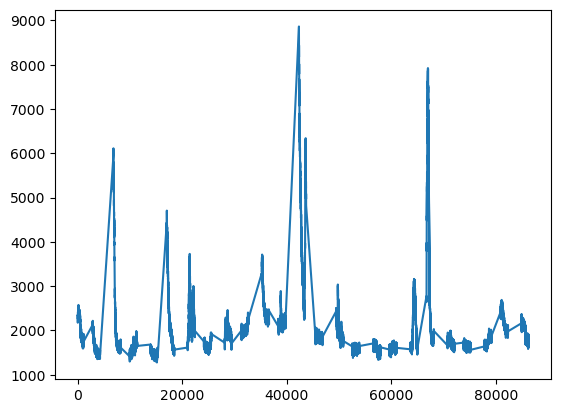

In [3]:
plt.plot(df.time,df.counts)
plt.show()


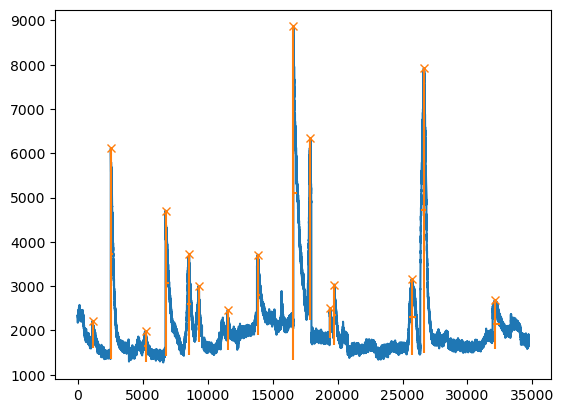

In [4]:
x = df.counts
peaks, properties = find_peaks(x, prominence=1, width=100)
properties["prominences"], properties["widths"]
(([1.495, 2.3  ]),([36.93773946, 39.32723577]))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

In [5]:
for i in range (len(peaks)):
    # print(peaks[i]," Height ",x[peaks[i]]," Time", properties["right_ips"][i]- properties["left_ips"][i])
    k=1
    for i in peaks:
        print(k," ",x[i]," ",i," ",properties["right_ips"][k-1]- properties["left_ips"][k-1])
        k+=1

1   2218.075   1145   121.20324908650491
2   6112.652   2542   188.4299973547577
3   1982.354   5214   225.43944421962624
4   4706.105   6757   235.10246404196732
5   3729.044   8572   299.82461254275404
6   3003.76   9295   149.56617935624126
7   2461.05   11539   132.29681796610748
8   3713.65   13857   255.96171956665603
9   8863.761   16602   293.1483387479275
10   6341.546   17888   189.54764101188994
11   2502.734   19428   103.23091019658023
12   3037.296   19746   141.48994183084142
13   3163.427   25732   496.90458290895185
14   7919.968   26632   398.52716349847833
15   2689.699   32112   535.3065116516264
1   2218.075   1145   121.20324908650491
2   6112.652   2542   188.4299973547577
3   1982.354   5214   225.43944421962624
4   4706.105   6757   235.10246404196732
5   3729.044   8572   299.82461254275404
6   3003.76   9295   149.56617935624126
7   2461.05   11539   132.29681796610748
8   3713.65   13857   255.96171956665603
9   8863.761   16602   293.1483387479275
10   6341